# Health Data versus Day of Week 

### Import data and begin cleaning  

The data was already very clean, as we only took measurements from the last 90 days and there was data for every day, thus the only cleaning required is converting any floats into more workable integers

In [8]:
import pandas as pd


health_df = pd.read_csv("health_data.csv")
steps = health_df["Step Count"]
stairs = health_df["Flights Climbed"]
date = health_df["Date"]

# clean steps by converting values to int from float
for val in steps:
    val = int(val)

days_df = pd.read_csv("days_of_week.csv")
merged_df = health_df.merge(days_df, on="Date")
merged_df.to_csv("merged_day_health.csv")

# split, apply, and combine data
grouped_by_day = merged_df.groupby("Day of Week")
mean_steps = pd.Series(dtype=float)
for day, day_df in grouped_by_day :
    day_mean_col = day_df["Step Count"].mean()
    mean_steps[day] = day_mean_col
    mean_steps.name = "Mean per Day"
    mean_steps.to_csv("Mean_per_Day.csv", na_rep="NA")
    
days = ["Mon", "Tues", "Wed", "Thur", "Fri", "Sat", "Sun"]
steps_by_day = []
steps_by_day.append(mean_steps["Monday"])
steps_by_day.append(mean_steps["Tuesday"])
steps_by_day.append(mean_steps["Wednesday"])
steps_by_day.append(mean_steps["Thursday"])
steps_by_day.append(mean_steps["Friday"])
steps_by_day.append(mean_steps["Saturday"])
steps_by_day.append(mean_steps["Sunday"])

mean_stairs = pd.Series(dtype=float)
for day, day_df in grouped_by_day :
    day_mean_col = day_df["Flights Climbed"].mean()
    mean_stairs[day] = day_mean_col
    mean_stairs.name = "Mean per Day"
    mean_stairs.to_csv("Mean_stairs_per_Day.csv", na_rep="NA")

stairs_by_day = []
stairs_by_day.append(mean_stairs["Monday"])
stairs_by_day.append(mean_stairs["Tuesday"])
stairs_by_day.append(mean_stairs["Wednesday"])
stairs_by_day.append(mean_stairs["Thursday"])
stairs_by_day.append(mean_stairs["Friday"])
stairs_by_day.append(mean_stairs["Saturday"])
stairs_by_day.append(mean_stairs["Sunday"])




### Plot the data

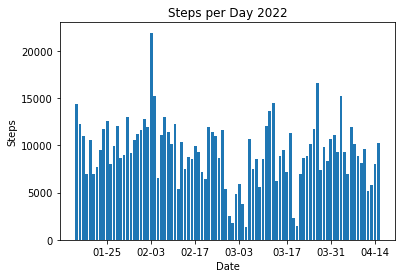

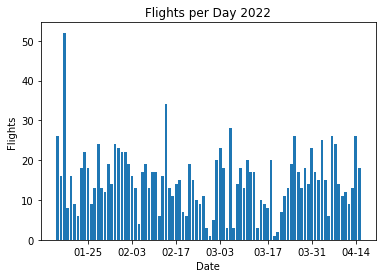

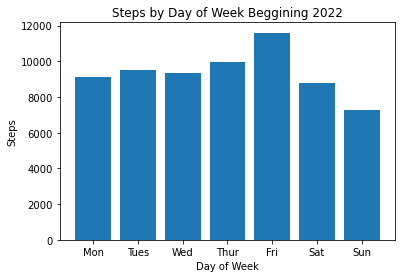

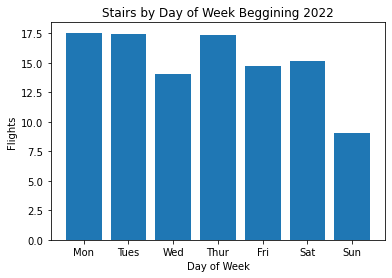

In [9]:
import matplotlib.pyplot as plt

plt.bar(date, steps)
plt.xlabel("Date")
plt.ylabel("Steps")
x_labels = ["01-25", "02-03", "02-17", "03-03", "03-17", "03-31", "04-14"]
x_ticks = [9, 22, 35, 48, 62, 75, 88]
plt.xticks(ticks=x_ticks,labels=x_labels, rotation=0)
plt.title("Steps per Day 2022")
plt.show()

plt.plot()
plt.bar(date, stairs)
plt.xlabel("Date")
plt.ylabel("Flights")
x_labels = ["01-25", "02-03", "02-17", "03-03", "03-17", "03-31", "04-14"]
x_ticks = [9, 22, 35, 48, 62, 75, 88]
plt.xticks(ticks=x_ticks,labels=x_labels, rotation=0)
plt.title("Flights per Day 2022")
plt.show()

plt.plot()
plt.bar(days, steps_by_day)
plt.xlabel("Day of Week")
plt.ylabel("Steps")
plt.title("Steps by Day of Week Beggining 2022")
plt.show()

plt.plot()
plt.bar(days, stairs_by_day)
plt.xlabel("Day of Week")
plt.ylabel("Flights")
plt.title("Stairs by Day of Week Beggining 2022")
plt.show()



## Categorizing Data  
Seperate amount of steps and amount flights climbed

In [20]:
steps_cat = pd.DataFrame
flights_cat = pd.DataFrame

steps_mean = sum(steps)/ len(steps)
flights_mean = sum(stairs) / len(stairs)

for i in range(len(steps)):
    if(steps[i] > steps_mean):
        steps_cat.append(1)
    else:
        steps_cat.append(0)

for i in range(len(stairs)):
    if(stairs[i] > flights_mean):
        flights_cat.append(1)
    else:
        flights_cat.append(0)



TypeError: append() missing 1 required positional argument: 'other'

### Hypothesis Testing  
We are going to test whether or not the amount of steps correlates to the amount of flights of stairs climbed in a day

In [19]:
from scipy import stats

# use t-test dependent 
t, pval = stats.ttest_rel(steps_by_day, steps_by_day)
pval /= 2 # divide by two because 1 rejection region
print("t:", t, "pval:", pval)
alpha = 0.01
if pval < alpha:
    print("reject H0")
else:
    print("do not reject H0")

t: nan pval: nan
do not reject H0
